<a href="https://colab.research.google.com/github/juanFFlorezM/Extraccion_de_datos/blob/main/RegresionLineal_AA_SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Primer paso:
# Se importa siempre las librerías necesarias para realizar el procesamiento estadístico
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Tercer paso: es el segundo paso si se debe…
#cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [8]:
df2=pd.read_excel('Q12p_excel.xlsx')

In [9]:
df2

,S,C,D,U,R
0,6.666667,5.666667,6.666667,5.666667,5.666667
1,4.666667,4.000000,4.666667,4.000000,4.000000
2,6.000000,5.000000,6.000000,5.000000,5.000000
3,5.000000,4.333333,5.000000,4.333333,4.333333
4,5.000000,4.000000,5.000000,4.000000,4.000000
5,6.666667,5.666667,6.666667,5.666667,5.666667
6,5.666667,6.000000,5.666667,6.000000,6.000000
7,7.000000,6.333333,7.000000,6.333333,6.333333
8,5.000000,5.000000,5.000000,5.000000,5.000000
9,5.666667,5.000000,5.666667,5.000000,5.000000


<Axes: xlabel='D', ylabel='S'>

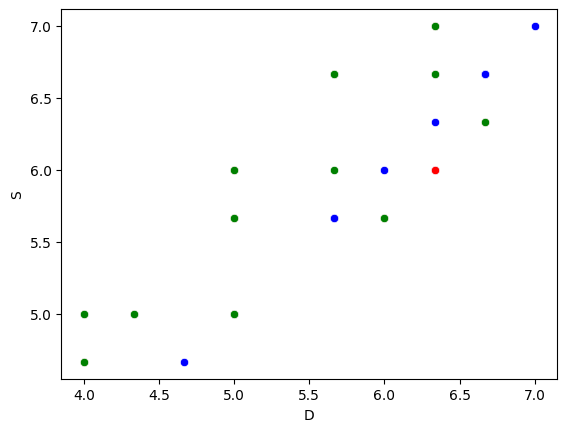

In [15]:
#Cuarto paso
#Imprimimos el scatter plot entre la variable dependiente S(presencia social) e independiente D(Diseño estilo de video)
# y U (Usabilidad)para observar el comportamiento en su dispersión
from turtle import color
sns.scatterplot(x='D', y='S', color="blue", data=df2)
sns.scatterplot(x='U ', y='S', color="red", data=df2)
sns.scatterplot(x='C ', y='S', color="green", data=df2)

In [29]:
#Quinto paso:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= df2[['C ','D']]
Var_Dep= df2['S']

In [30]:
#Sexto paso:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [31]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [32]:
#Octavo paso:
#Verificamos los coeficientes obtenidos para el modelo ajustado, pidiendo el diccionario del #modelo
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['C ', 'D'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.012725  , 0.96834945]),
 'rank_': 2,
 'singular_': array([3.94125263, 1.14944706]),
 'intercept_': 0.09282309934755517}

In [33]:
#Noveno paso:
#Predecimos los valores de S (presencia social) a partir de la variable "C "
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred2= model.predict(X=df2[['C ','D']])
y_pred2

array([6.62059445, 4.66268721, 5.96654482, 4.98971203, 4.98547036,
       6.62059445, 5.65648667, 6.95186094, 4.99819536, 5.64376166,
       6.62907778, 6.3105363 , 6.2978113 ])

In [34]:
#Decimo paso:
#Insertamos la columna de predicciones en la columna 0 del DataFrame con el nombre Predi
df2.insert(0, 'Sp2', y_pred2)
df2

,Sp2,Sp,S,C,D,U,R
0,6.620594,6.097826,6.666667,5.666667,6.666667,5.666667,5.666667
1,4.662687,4.873490,4.666667,4.000000,4.666667,4.000000,4.000000
2,5.966545,5.608092,6.000000,5.000000,6.000000,5.000000,5.000000
3,4.989712,5.118357,5.000000,4.333333,5.000000,4.333333,4.333333
4,4.985470,4.873490,5.000000,4.000000,5.000000,4.000000,4.000000
5,6.620594,6.097826,6.666667,5.666667,6.666667,5.666667,5.666667
6,5.656487,6.342693,5.666667,6.000000,5.666667,6.000000,6.000000
7,6.951861,6.587560,7.000000,6.333333,7.000000,6.333333,6.333333
8,4.998195,5.608092,5.000000,5.000000,5.000000,5.000000,5.000000
9,5.643762,5.608092,5.666667,5.000000,5.666667,5.000000,5.000000


<Axes: xlabel='C ', ylabel='S'>

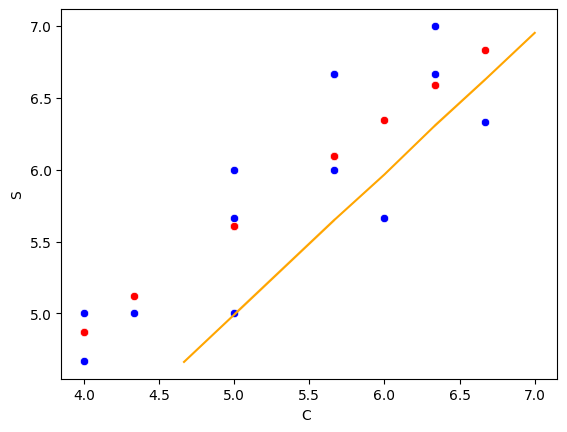

In [36]:
#Onceavo paso:
#Visualizamos la gráfica comparativa entre el S real y el S predecido
sns.scatterplot(x='C ', y='S', color="blue", data=df2)
sns.scatterplot(x='C ', y='Sp', color="red", data=df2)
sns.lineplot(x='D', y='Sp2', color="orange", data=df2)

In [37]:
#Doceavo paso:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.9862711102928605

In [38]:
#Treceavo paso:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.9931118317152708

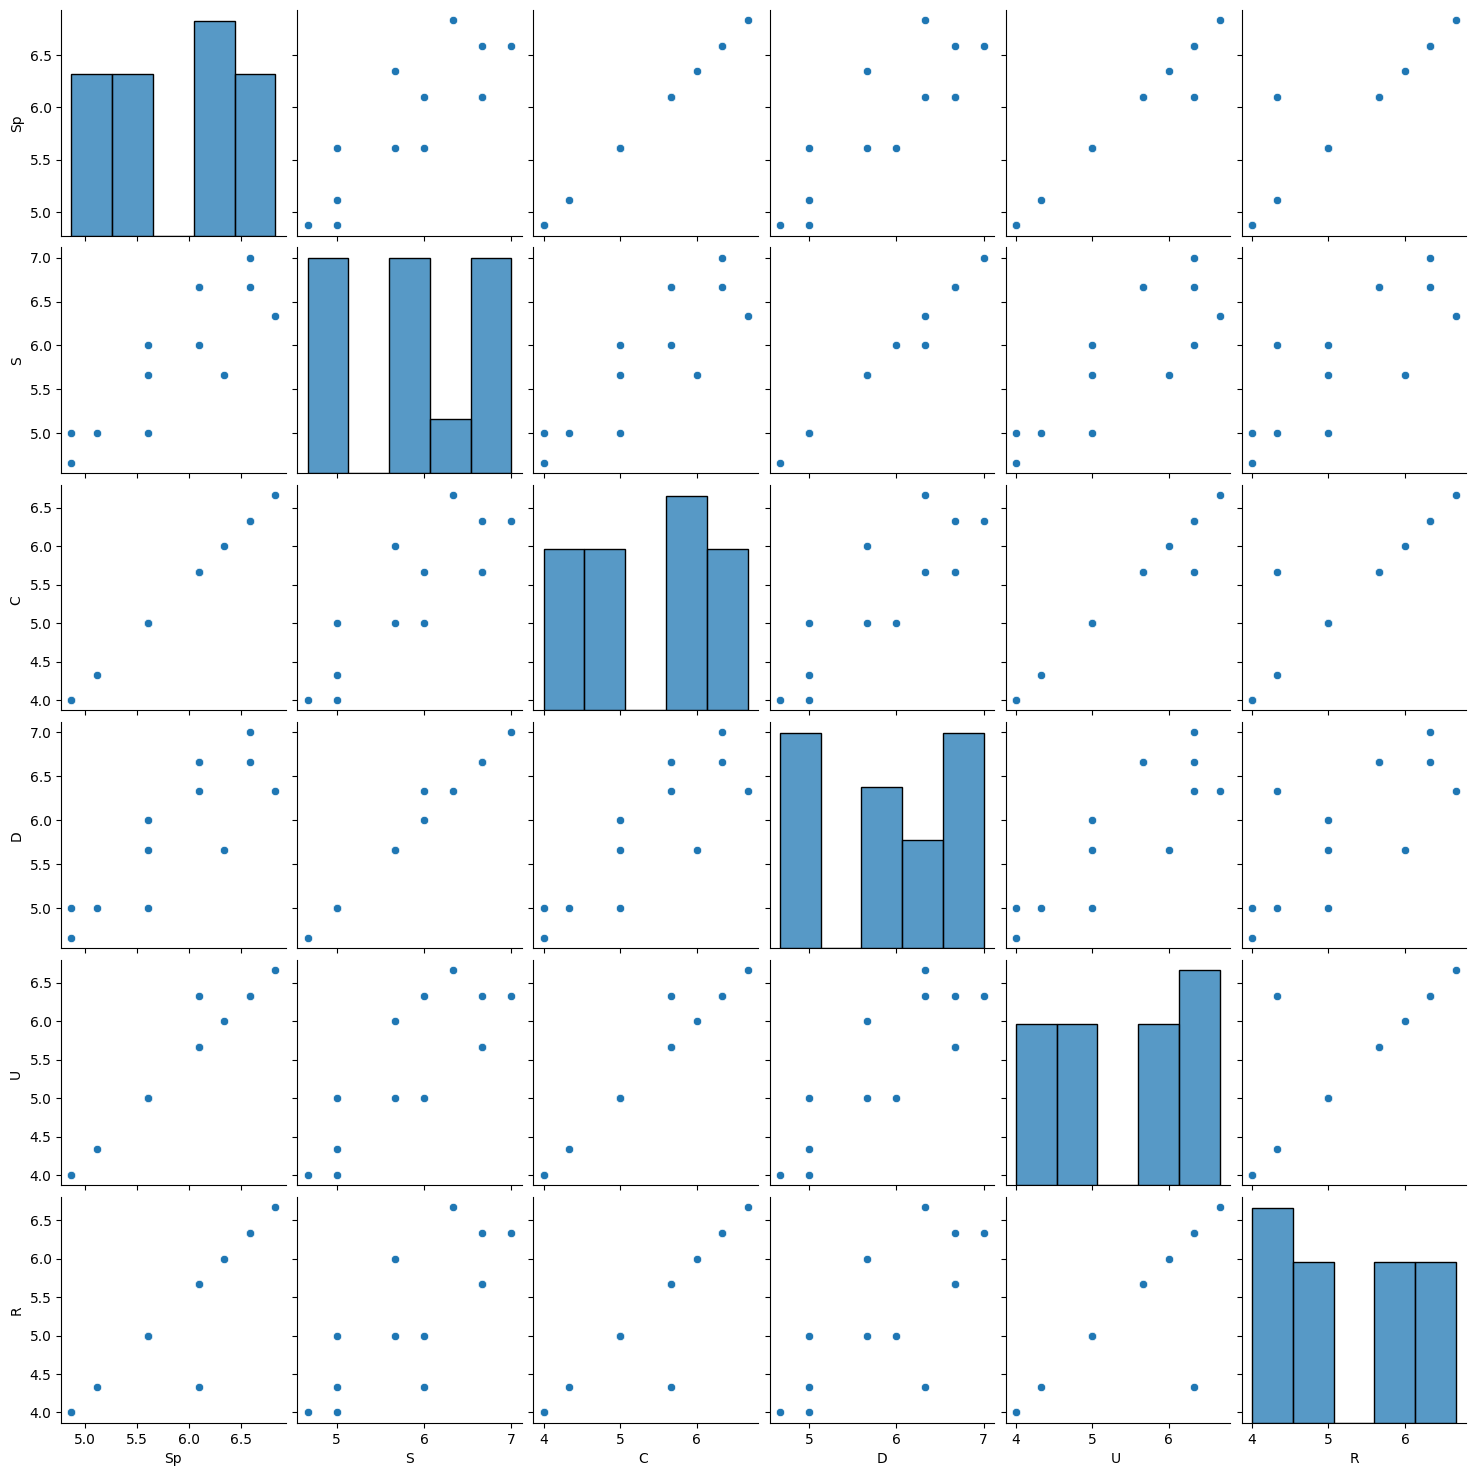

In [26]:
#Quinceavo paso:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df2)

In [27]:
#Dieziseisavo paso:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=df2.corr()
Corr_Factors

,Sp,S,C,D,U,R
Sp,1.000000,0.839172,1.000000,0.840728,0.980018,0.917463
S,0.839172,1.000000,0.839172,0.993081,0.814831,0.785056
C,1.000000,0.839172,1.000000,0.840728,0.980018,0.917463
D,0.840728,0.993081,0.840728,1.000000,0.839712,0.739770
U,0.980018,0.814831,0.980018,0.839712,1.000000,0.820000
R,0.917463,0.785056,0.917463,0.739770,0.820000,1.000000


<Axes: >

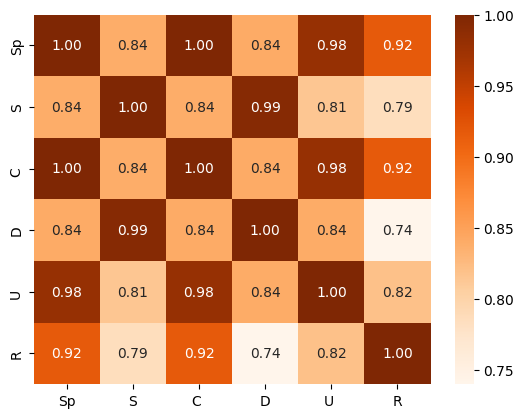

In [28]:
#Dieziochoavo paso:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map= sns.heatmap(Corr_Factors, cmap = 'Oranges', annot=True, fmt=".2f")
Heat_Map